In [ ]:
corpus = [
          "Saya sedang belajar data science",
          "data yang saya proses adalah data teks",
          "NLP adalah cabang besar didalam data science"
]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
vect = CountVectorizer()
vect.fit(corpus)

CountVectorizer()

In [ ]:
vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['adalah',
 'belajar',
 'besar',
 'cabang',
 'data',
 'didalam',
 'nlp',
 'proses',
 'saya',
 'science',
 'sedang',
 'teks',
 'yang']

In [ ]:
corpus_vect = vect.transform(corpus)
print(corpus_vect)

  (0, 1)	1
  (0, 4)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (1, 0)	1
  (1, 4)	2
  (1, 7)	1
  (1, 8)	1
  (1, 11)	1
  (1, 12)	1
  (2, 0)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 9)	1


In [ ]:
corpus_vect.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]])

In [ ]:
pd.DataFrame(corpus_vect.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,adalah,belajar,besar,cabang,data,didalam,nlp,proses,saya,science,sedang,teks,yang
0,0,1,0,0,1,0,0,0,1,1,1,0,0
1,1,0,0,0,2,0,0,1,1,0,0,1,1
2,1,0,1,1,1,1,1,0,0,1,0,0,0


In [ ]:
print(corpus)

['Saya sedang belajar data science', 'data yang saya proses adalah data teks', 'NLP adalah cabang besar didalam data science']


## Pemodelan Machine Learning untuk SMS Spam

In [ ]:
! pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 24.7 MB/s 


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/afifai/hacktiv8-trial-class-spamdetector/main/data/dataset_sms_spam%20_v1.csv")
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
df.label = df.label.map({0:"SMS Biasa", 1:"SMS Penipuan", 2:"SMS Operator"})

In [ ]:
df.tail()

,Teks,label
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",SMS Biasa
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,SMS Biasa
1140,Mba mau kirim 300 ya,SMS Biasa
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,SMS Biasa
1142,No bri atas nama kamu mana,SMS Biasa


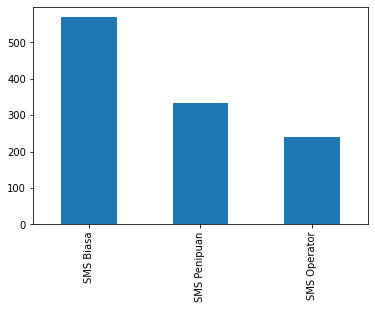

In [ ]:
df.label.value_counts().plot(kind='bar');

In [ ]:
df.label.value_counts()

SMS Biasa       569
SMS Penipuan    335
SMS Operator    239
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.Teks, df.label, test_size=0.15, random_state=46, stratify=df.label)

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# buat fungsi stem untuk series
def stem_sent(sent):
  output   = stemmer.stem(sent)
  return output

X_train = X_train.apply(stem_sent)
X_test = X_test.apply(stem_sent)

In [ ]:
# vektorisasi
vect = CountVectorizer()

# train
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

In [ ]:
X_train_vec

<971x4043 sparse matrix of type '<class 'numpy.int64'>'
	with 16282 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_vec

<172x4043 sparse matrix of type '<class 'numpy.int64'>'
	with 2458 stored elements in Compressed Sparse Row format>

In [ ]:
# modelling
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# evaluasi
y_pred = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       1.00      0.93      0.96        86
SMS Operator       0.84      1.00      0.91        36
SMS Penipuan       0.96      0.94      0.95        50

    accuracy                           0.95       172
   macro avg       0.93      0.96      0.94       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
y_pred = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       0.99      0.93      0.96        86
SMS Operator       0.82      1.00      0.90        36
SMS Penipuan       0.96      0.90      0.93        50

    accuracy                           0.94       172
   macro avg       0.92      0.94      0.93       172
weighted avg       0.94      0.94      0.94       172



In [ ]:
sms_baru = ["met ulang tahun bro"]
sms_baru = [stemmer.stem(sms_baru[0])]
sms_baru_vect = vect.transform(sms_baru)
res = nb.predict(sms_baru_vect)
print(res)

['SMS Operator']


## Model Deep Learning & Embedding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/afifai/hacktiv8-trial-class-spamdetector/main/data/dataset_sms_spam%20_v1.csv")
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.15, random_state=46, stratify=df.label)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=46, stratify=train_df.label)

In [ ]:
train_df.shape

(873, 2)

In [ ]:
val_df.shape

(98, 2)

In [ ]:
test_df.shape

(172, 2)

In [ ]:
import random
random_index = random.randint(0, len(train_df) - 5)
for row in train_df[['Teks', "label"]][random_index:random_index + 5].itertuples():
  _, teks, target = row
  if target == 0:
    print(f"Label : {target} (SMS BIASA)")
  elif target == 1:
    print(f"Label : {target} (SMS PENIPUAN)")
  elif target == 2:
    print(f"Label : {target} (SMS OPERATOR)")
  print(f"Teks: {teks}\n")
  print("--\n")

Label : 2 (SMS OPERATOR)
Teks: Mau Cepat GIFT Paket/Extra Kuota Internet & ga mau ribet isi ulang Pulsa? Download aja aplikasi myCare, smuanya jadi mudah. Install di http://bit.ly/mycarepLy

--

Label : 0 (SMS BIASA)
Teks: nama1 .. Saya masih di perjalanan.. Besok aja habis jumatan ketemu di kanto.. Web service nya juga sudah bisa di akses

--

Label : 1 (SMS PENIPUAN)
Teks: Surat keputusan PT.TRI.3 SimCard anda Resmi M-dptakan Hadiah HONDA JAZZ Rs Pin Undian: 477BFG7S. Info Hub: 089667794299 KLIK : www.gebyar-tricare.com

--

Label : 0 (SMS BIASA)
Teks: Maaf Anda tidak bisa mengaktifkan paket FLASH ini karena nomor anda tidak terdaftar

--

Label : 0 (SMS BIASA)
Teks: Ga ada birthday nya ? Wkwk

--



In [ ]:
# siapkan label
from tensorflow.keras.utils import to_categorical

X_train, y_train = train_df.Teks, train_df.label
X_val, y_val = val_df.Teks, val_df.label
X_test, y_test = test_df.Teks, test_df.label

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [ ]:
# tokenisasi
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [ ]:
round(sum([len(i.split()) for i in X_train]) / len(X_train))

17

In [ ]:
# setup vect
max_vocab_length = 3500
max_length = 17

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_length,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

In [ ]:
text_vectorization.adapt(X_train)

In [ ]:
# sms baru
sample_sms = "selamat no anda memenangkan undian berhadiah babi ngepet"
text_vectorization([sample_sms])

<tf.Tensor: shape=(1, 17), dtype=int64, numpy=
array([[  33,   15,    3, 2748,   88,    1,    1,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])>

In [ ]:
text_vectorization.get_vocabulary()[:5]

['', '[UNK]', 'di', 'anda', 'ke']

In [ ]:
# embedding layer
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=max_vocab_length,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_length
                      )

In [ ]:
sample_sms = "selamat no anda memenangkan undian berhadiah babi ngepet"
emb_res = embedding(text_vectorization([sample_sms]))
emb_res[0][2]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03428899, -0.03451946, -0.00781988, -0.01979145, -0.01756976,
        0.01296284, -0.02123101, -0.0342186 , -0.03339412, -0.01709861,
        0.042089  , -0.0336923 , -0.00153359, -0.02194235,  0.00663483,
        0.00992731,  0.04292   , -0.00398896, -0.00653485, -0.00213157,
        0.03198905,  0.00679966, -0.03914181,  0.0151224 , -0.02015319,
       -0.00472694, -0.04250383, -0.00182178,  0.01981303,  0.02769691,
       -0.02540262,  0.03351225, -0.02605178,  0.03884189, -0.00264082,
       -0.04444594, -0.01699115, -0.03713491,  0.04675516,  0.01800003,
       -0.0422403 , -0.0247187 ,  0.00427764,  0.01529999, -0.04272334,
        0.04593444,  0.00353203, -0.04356933, -0.0064467 , -0.03528144,
        0.02189305,  0.02998096, -0.01041186,  0.01969199,  0.00283235,
       -0.00583165,  0.00835796,  0.04030584, -0.00940956,  0.01464887,
        0.03000981, -0.02854207,  0.03990506,  0.03118839, -0.00274731,
       -0.000912

Pemodelan

In [ ]:
# fully connected layer
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model, Sequential

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# inputs = Input(shape=(1,), dtype="string")
# x = text_vectorization(inputs)
# x = embedding(x)
# x = GlobalAveragePooling1D()(x)
# x = Dense(32, activation='relu')(x)
# out = Dense(3, activation='softmax')(x)
# model = Model(inputs, out)



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_1_hist = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 1s 11ms/step - loss: 0.9054 - accuracy: 0.9049 - val_loss: 0.7339 - val_accuracy: 0.8776
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5277 - accuracy: 0.9920 - val_loss: 0.4424 - val_accuracy: 0.8980
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.2585 - accuracy: 0.9931 - val_loss: 0.2931 - val_accuracy: 0.9184
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.1248 - accuracy: 0.9966 - val_loss: 0.2441 - val_accuracy: 0.8980
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0683 - accuracy: 0.9977 - val_loss: 0.2277 - val_accuracy: 0.9082
Epoch 6/50
28/28 [==============================] - 0s 6ms/step - loss: 0.0428 - accuracy: 0.9977 - val_loss: 0.2174 - val_accuracy: 0.9082
Epoch 7/50
28/28 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9989 - val_loss: 0.2183 - val_accuracy: 0.9184
Epoch 8/50
28/28 [=

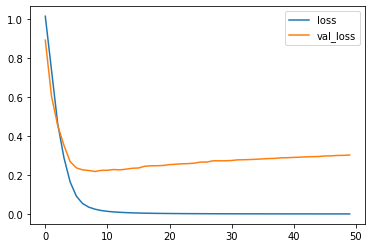

In [ ]:
metrics = pd.DataFrame(model_1_hist.history)
metrics[['loss', 'val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        49
           1       0.82      0.97      0.89        29
           2       0.94      0.75      0.83        20

    accuracy                           0.92        98
   macro avg       0.91      0.89      0.90        98
weighted avg       0.92      0.92      0.92        98



In [ ]:
sms_baru = [
            "hai bro, apa kabar?",
            "dapatkan kuota 1 GB hanya 10 ribu saja, beli di MyGsm",
            "pesugihan halal, lipatgandakan uang ada dan lunasi hutang anda"
]

hasil = model.predict(sms_baru)
hasil.argmax(axis=1)

array([0, 2, 0])

In [ ]:
# model LSTM
from tensorflow.keras.layers import LSTM, Dropout

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(Dropout(0.4))
model.add(LSTM(4))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_2_hist = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 3s 24ms/step - loss: 1.0205 - accuracy: 0.4238 - val_loss: 0.8961 - val_accuracy: 0.7653
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 0.7551 - accuracy: 0.7595 - val_loss: 0.6713 - val_accuracy: 0.8776
Epoch 3/50
28/28 [==============================] - 0s 6ms/step - loss: 0.5552 - accuracy: 0.8511 - val_loss: 0.5496 - val_accuracy: 0.8776
Epoch 4/50
28/28 [==============================] - 0s 6ms/step - loss: 0.4239 - accuracy: 0.9198 - val_loss: 0.4957 - val_accuracy: 0.8776
Epoch 5/50
28/28 [==============================] - 0s 6ms/step - loss: 0.3524 - accuracy: 0.9381 - val_loss: 0.4989 - val_accuracy: 0.8469
Epoch 6/50
28/28 [==============================] - 0s 6ms/step - loss: 0.2923 - accuracy: 0.9404 - val_loss: 0.4217 - val_accuracy: 0.8878
Epoch 7/50
28/28 [==============================] - 0s 7ms/step - loss: 0.2714 - accuracy: 0.9496 - val_loss: 0.4133 - val_accuracy: 0.8878
Epoch 8/50
28/28 [=

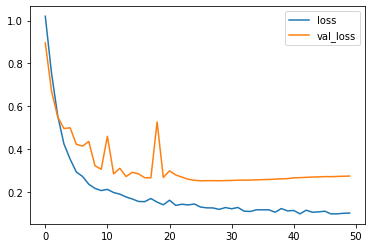

In [ ]:
metrics = pd.DataFrame(model_2_hist.history)
metrics[['loss', 'val_loss']].plot()

In [ ]:
y_pred = model.predict(X_val)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       0.96      0.90      0.93        29
           2       0.89      0.85      0.87        20

    accuracy                           0.94        98
   macro avg       0.93      0.92      0.92        98
weighted avg       0.94      0.94      0.94        98



In [ ]:
sms_baru = [
            "hai bro, apa kabar?",
            "dapatkan kuota 1 GB hanya 10 ribu saja, beli di MyGsm",
            "pesugihan halal, lipatgandakan uang ada dan lunasi hutang anda"
]

hasil = model.predict(sms_baru)
hasil.argmax(axis=1)

array([0, 2, 0])

In [ ]:
# model LSTM
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(Dropout(0.4))
model.add(GRU(2))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_3_hist = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 3s 24ms/step - loss: 0.9611 - accuracy: 0.6037 - val_loss: 0.8673 - val_accuracy: 0.6939
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 0.8123 - accuracy: 0.7148 - val_loss: 0.7674 - val_accuracy: 0.7551
Epoch 3/50
28/28 [==============================] - 0s 6ms/step - loss: 0.7388 - accuracy: 0.7251 - val_loss: 0.6996 - val_accuracy: 0.7857
Epoch 4/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6563 - accuracy: 0.7491 - val_loss: 0.6466 - val_accuracy: 0.7857
Epoch 5/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6032 - accuracy: 0.7927 - val_loss: 0.6048 - val_accuracy: 0.7959
Epoch 6/50
28/28 [==============================] - 0s 7ms/step - loss: 0.5925 - accuracy: 0.7927 - val_loss: 0.5762 - val_accuracy: 0.8265
Epoch 7/50
28/28 [==============================] - 0s 6ms/step - loss: 0.5523 - accuracy: 0.8225 - val_loss: 0.5519 - val_accuracy: 0.8265
Epoch 8/50
28/28 [=

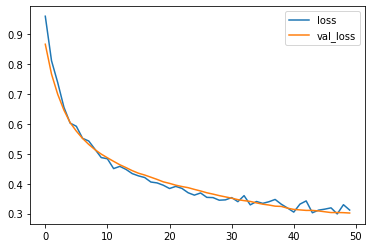

In [ ]:
metrics = pd.DataFrame(model_3_hist.history)
metrics[['loss', 'val_loss']].plot()

In [ ]:
y_pred = model.predict(X_val)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        49
           1       0.84      0.90      0.87        29
           2       0.79      0.75      0.77        20

    accuracy                           0.88        98
   macro avg       0.86      0.85      0.85        98
weighted avg       0.88      0.88      0.88        98



In [ ]:
sms_baru = [
            "hai bro, apa kabar?",
            "dapatkan kuota 1 GB hanya 10 ribu saja, beli di MyGsm",
            "pesugihan halal, lipatgandakan uang ada dan lunasi hutang anda"
]

hasil = model.predict(sms_baru)
hasil.argmax(axis=1)

array([2, 2, 1])